In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [2]:
def sinc(x):
    return np.sinc(x / np.pi)


def sincn(n):
    def inner(x):
        result = 1
        for i in range(n):
            result *= sinc(x/(2*i+1))
        return result
    return inner


integrate.quad(sincn(1), -np.inf, np.inf, limit=1000, epsabs=1e-12)

C:\Users\Terry\AppData\Local\Temp\ipykernel_25876\2069108514.py:14: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrate.quad(sincn(1), -np.inf, np.inf, limit=1000, epsabs=1e-12)


(3.6803411719925263, 0.13728397073769028)

d:\Folder\Anaconda_37\envs\scientific\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
d:\Folder\Anaconda_37\envs\scientific\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


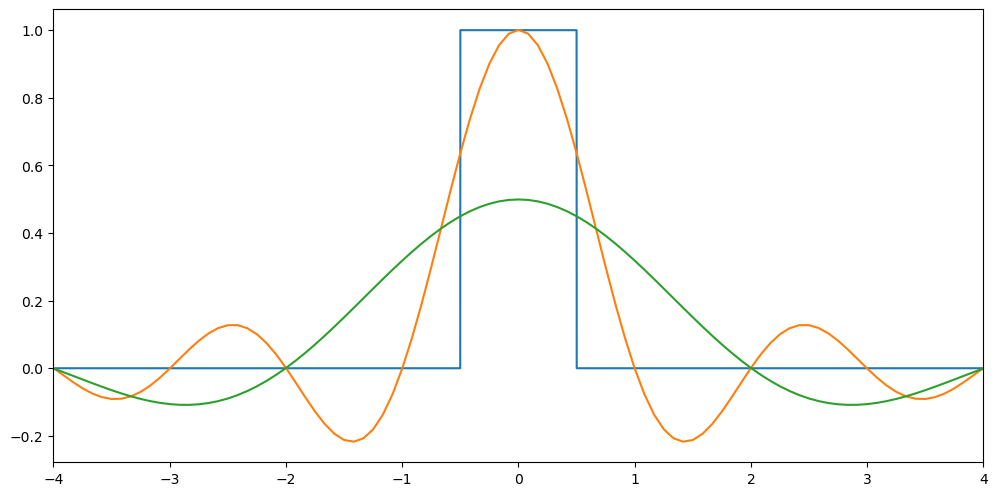

In [7]:
# fourier transform on the rect function
def rect(x):
    arr = np.zeros(x.size)
    arr[abs(x) <= 0.5] = 1
    return arr


def dft(signal, dt = 1):
    # for the fft to be correct, we must shift the signal (assumed to be symmetrical around t = 0) to where the first index is when t = 0

    fxs = np.fft.fftfreq(signal.size, dt)
    fys = np.fft.fft(np.fft.fftshift(signal)) * dt

    return np.fft.fftshift(fxs), np.fft.fftshift(fys)
    


def testtransform():
    xs = np.linspace(-6, 6, 10000)
    ys = rect(xs)


    plt.figure(figsize=(12, 6), dpi=100)
    plt.plot(xs, ys)

    # fourier transform
    dt = xs[1] - xs[0]
    fxs, fys = dft(ys, dt)
    plt.plot(fxs, fys)

    nys = rect(xs * 2)
    fxs, fys = dft(nys, dt)
    plt.plot(fxs, fys)

    plt.xlim(-4, 4)


testtransform()




### Integration Techniques
Here are some simple and advanced integration techniques to analytically integrate intergrals of real integrands - $y = f(x)$ where $x, y\in\mathbb{R}$.

#### Standard Integrals of Elementary Functions
I should know these, so not listed.

#### Simple Techniques
Throughout, suppose that $f(x), g(x)$ are real functions, and $a, b$ are real constants, and the integration domain is $D = [a, b]$, where $a, b \in \mathbb{R}$.

Integrals are **linear**, in that
$$
    \int_D a f(x) + b g(x) \, dx = a \int_D f(x) \, dx + b \int_D g(x) \, dx
$$

Using **U-Substitution**, one can replace the variable $x$ with $u(x)$, a domain transformation of $x \rightarrow u(x)$
$$
    \int_D f(u(x)) u'(x) \, dx = \int_{u[D]} f(u) \, du
$$

In reverse, where there exist a function $x(u)$
$$
    \int_D f(x) \, dx = \int_{x^{-1}[D]} f(x(u)) x'(u) \, du
$$

**Integration by parts** is the inverse of the product rule
$$
    \int_D f(x) g'(x) \, dx = f(x) g(x) \bigg\vert_D - \int_D f'(x) g(x) \, dx
$$

For multiple integration by parts operations, a tablaeu can be used:
| $\pm$ | $\partial_x$   | $\mathcal{I}_x$         |
| ---   | ---            | ---                     |
| +     | $f$            | $g$                 |
| -     | $\partial_x f$ | $\mathcal{I}_x g$   |
| +     | $\partial_x^2 f$ | $\mathcal{I}_x^2 g$ |
| -     | $\partial_x^3 f$ | $\mathcal{I}_x^3 g$ |
| $\vdots$ | $\vdots$ | $\vdots$ |

the result is the summation on the product of the diagonals each multiplied by its first column sign. Symbolically, this is
$$
\begin{align*}
\int_D f g \, dx &= f \cdot \mathcal{I}_x [g] \bigg\vert_D - \int_D \partial_x[f] \mathcal{I}_x [g] \, dx \\
                  &= \left( f \cdot \mathcal{I}_x [g] - \partial_x[f]\mathcal{I}_x^2[g] \right) \bigg\vert_D + \int_D \partial_x^2[f] \mathcal{I}_x^2[g] \, dx \\
                  &= \left( f \cdot \mathcal{I}_x [g] - \partial_x[f]\mathcal{I}_x^2[g] + \partial_x^2[f]\mathcal{I}_x^3[g] \right) \bigg\vert_D - \int_D \partial_x^3[f] \mathcal{I}_x^3[g] \, dx \\
                  &= \cdots
\end{align*}
$$
The process should terminate when: 1. the final integral is integratable by other methods 2. the final integral resembles the initial integral 3. the final integral cancels with other integrals in the equation.


#### Harder Techniques

**Laplace transform** can be used to solve integrals and even differential equations. It is defined to be
$$
    (\mathcal{L} f)(s) = \int_0^\infty f(x) e^{-st} \, dt
$$

For its identities, refer to v2whiteboards, or [MathWorlds](https://mathworld.wolfram.com/LaplaceTransform.html).

The solving for function $f(x)$ using Laplace transforms resembles:
- Transform the differential/integral equation using the Laplace transform
- Simplify the polynominal into a form where $(\mathcal{L} f)$ is the subject
- Inverse Laplace transform the transformed equation
- Obtain the solved $f(x)$ function


The use of **Leibniz's Integral Rule**, or "Feynmann's Technique" can solve integrals by generalizing the function and differentiate under the integral sign.

The integral rule is
$$
    \partial_t \left( \int_{a(t)}^{b(t)} f(x, t) \, dx \right) = f(b(t), t) \cdot \partial_t b(t) - f(a(t), t) \cdot \partial_t a(t) + \int_{a(t)}^{b(t)} \partial_t f(x, t) \, dx
$$
and when the bounds are constants, it is
$$
    \partial_t \left( \int_D f(x, t) \, dx  \right) = \int_D \partial_t f(x, t) \, dx
$$

The Leibniz's Integral Rule to solve integrals $I=\int f(x) \, dx$ follow:
- Append a real variable $\alpha$ to the integrand
- Define the new function $I(\alpha)$ where $I(\alpha_0) = I$
- Differentiate both sides by $\alpha$, solve the integral on the right side
- Solve the differential equation of $\partial_\alpha I = \dots$, or simply integrate the right side
- Obtain the function $I(\alpha)$ without integrals, then substitute $I(\alpha_0)$ to receive the solution $I$

Symbolically, it is
$$
\begin{align*}
    I &= \int f(x) \, dx \\
    I(\alpha) &= \int f(\alpha, x) \, dx\\
    I(\alpha_0) &= I\\
    \partial_\alpha I(\alpha) &= \int \partial_\alpha f(\alpha, x) \, dx\\
    &= g(\alpha, x)\\
    I(\alpha) &= \int g(\alpha, x) \, d\alpha\\
\end{align*}
$$

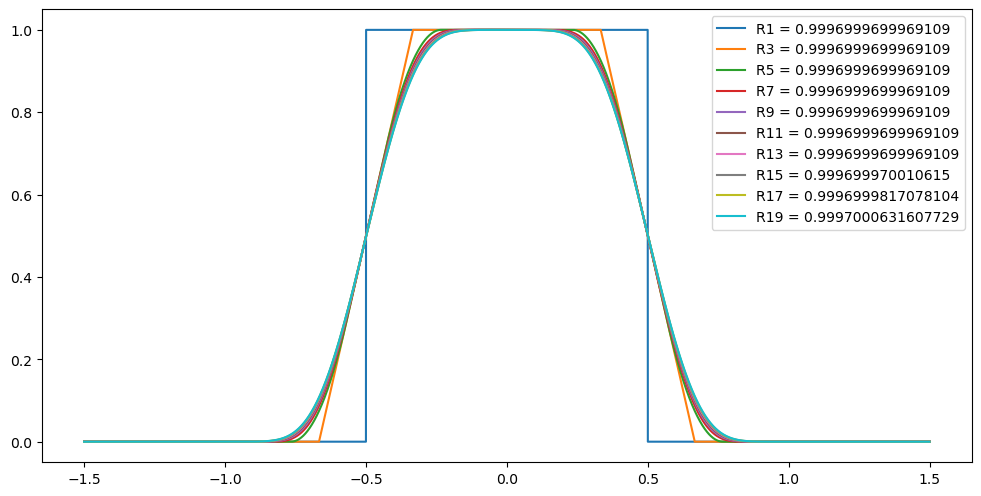

In [47]:
# the convolution stuff


def rect(x):
    res = np.zeros(len(x))
    res[np.abs(x) < 0.5] = 1
    return res

def convo(f, g):
    res = np.convolve(f, g, mode = 'same')
    return res / res.max() * 1

def testconv():
    xs = np.linspace(-1.5, 1.5, 10000)
    dx = xs[1]-xs[0]

    # here is a series of convolutions of the box function
    plt.figure(figsize=(12, 6), dpi=100)


    N = 10
    rects = [rect(xs)]
    areas = [np.sum(rects[0]) * dx]

    plt.plot(xs, rects[-1], label=f"R{1} = {areas[-1]}")

    for i in range(1, N):
        odd = 2*i + 1
        rects.append(convo(rects[-1], rect(odd * xs)))
        areas.append(np.sum(rects[-1]) * dx)

        plt.plot(xs, rects[-1], label=f"R{odd} = {areas[-1]}")
   

    plt.legend()


testconv()


d:\Folder\Anaconda_37\envs\scientific\lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


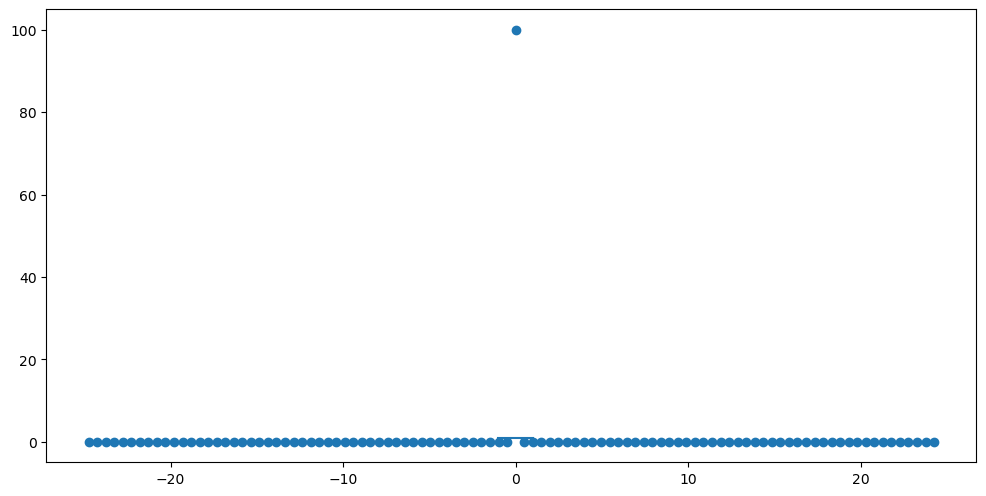

In [53]:
# test fourier transforms
def testfourier():
    xs = np.linspace(-1, 1, 100)
    dx = xs[1]-xs[0]
    ys = np.ones(xs.size)

    plt.figure(figsize=(12, 6), dpi=100)
    plt.plot(xs, ys)
    plt.scatter(np.fft.fftfreq(xs.size, d=dx), np.fft.fft(ys))


testfourier()